1.2383073190678595
1.0737296076112486
    std_sum  row_std_oxo  row_std_h
0  1.097770     0.797472   0.487225
1  0.966609     0.555773   0.555969
2  0.850082     0.493838   0.484554
3  0.844191     0.459860   0.507690
4  0.819151     0.574880   0.381071


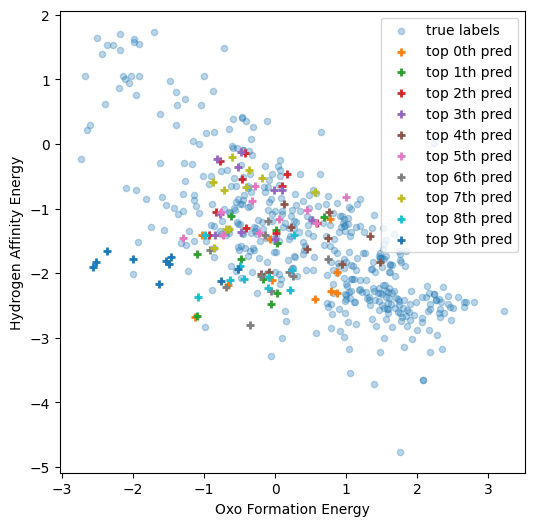

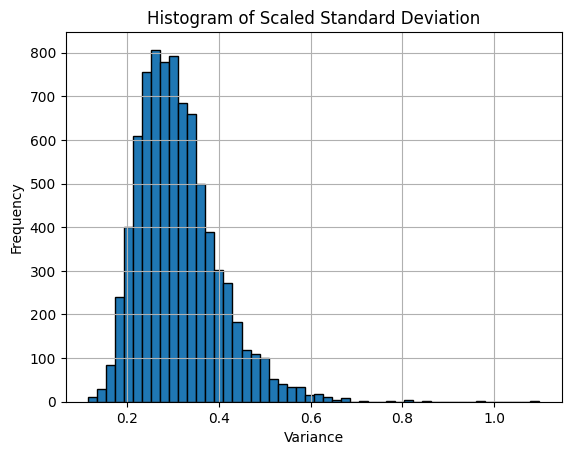

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
prop = "oxo"
rf_file_path = f"/scratch/yll6162/MOF-oxo/output/rf_pred_{prop}_idx_iter_all_var_query_1.csv"
df_var_oxo = pd.read_csv(rf_file_path, index_col = 0)
prop = "h"
rf_file_path = f"/scratch/yll6162/MOF-oxo/output/rf_pred_{prop}_idx_iter_all_var_query_1.csv"
df_var_h = pd.read_csv(rf_file_path, index_col = 0)

df_var = df_var_h.merge(df_var_oxo, how='inner', on='ids_test', suffixes = ['_h','_oxo'])

# df_var["var_sum"] = df_var["row_variances_oxo"] + df_var["row_variances_h"]
src_file_path = "./labels/qmofruns_2_suffled.csv"
df_src = pd.read_csv(src_file_path, index_col = 0)

# global_oxo_std = np.std(df_var_oxo.drop(columns = ["ids_test"]).values)
global_oxo_std = np.std(df_src["Oxo Formation Energy"].values)
global_h_std = np.std(df_src["Hydrogen Affinity Energy"].values)
# global_h_std = np.std(df_var_h.drop(columns = ["ids_test"]).values)
df_var['std_sum'] =  df_var["row_std_oxo"] / global_oxo_std + df_var["row_std_h"] / global_h_std
df_var = df_var.sort_values(by="std_sum", ascending=False).reset_index(drop=True)
print(global_oxo_std)
print(global_h_std)
print(df_var[["std_sum", "row_std_oxo", "row_std_h"]].sort_values(by="std_sum", ascending=False).head())


plt.figure(figsize = (6,6))
plt.scatter(df_src["Oxo Formation Energy"].values, df_src["Hydrogen Affinity Energy"].values, s=20, marker='o', alpha=0.3, label="true labels")
plt.xlabel('Oxo Formation Energy')
plt.ylabel('Hydrogen Affinity Energy')
h_cols = [f"predictions_seed_{i}_h" for i in range(10)]
oxo_cols = [f"predictions_seed_{i}_oxo" for i in range(10)]
for i in range(10):
    plt.scatter(df_var.loc[i, oxo_cols].values, df_var.loc[i, h_cols].values, s=30, linewidths=2, marker='+', label=f"top {i}th pred")
plt.legend()
plt.show()


plt.hist(df_var['std_sum'], bins=50, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.title('Histogram of Scaled Standard Deviation')
plt.grid(True)
plt.show()


In [3]:
# Generate querys 
k = 300
fea_file_path = "./mof_features/Features_RACS.csv"
df_fea = pd.read_csv(fea_file_path, index_col = 0)
# df_fea = df_fea[df_fea["Metal"].isin(["Ti", "V", "Cr", "Mn", "Fe", "Co", "Ni", "Cu", "Zn"])]
df_fea = df_fea[df_fea["Metal"].isin(["Ti", "V", "Cr", "Mn", "Fe", "Co", "Ni", "Cu"])]
df_fea["ids"] = df_fea["MOF Name"] +'.cif_' + df_fea["Metal_index"].astype(str)
df_var = df_var[df_var.ids_test.isin(df_fea["ids"])].sort_values(by="std_sum", ascending=False)
df_var[:k].to_csv(f"./query/generation_2_{k}_first_row_only.csv")